In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from joblib import dump , load
import plotly.express as px

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/digipodium/Datasets/main/house_pricing.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 814 entries, 0 to 813
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        814 non-null    object 
 1   Type        814 non-null    object 
 2   Beds        814 non-null    int64  
 3   Baths       814 non-null    int64  
 4   SquareFeet  814 non-null    int64  
 5   Price       814 non-null    float64
dtypes: float64(1), int64(3), object(2)
memory usage: 38.3+ KB


,City,Type,Beds,Baths,SquareFeet,Price
0,SACRAMENTO,Residential,2,1,836,138159.85
1,SACRAMENTO,Residential,3,1,1167,167541.46
2,SACRAMENTO,Residential,2,1,796,119095.12
3,SACRAMENTO,Residential,2,1,852,130904.95
4,SACRAMENTO,Residential,2,1,797,120266.19


In [4]:
print(df.columns.tolist())


['City', 'Type', 'Beds', 'Baths', 'SquareFeet', 'Price']


In [5]:
X = df[['Beds','Baths','SquareFeet']]
y = df['Price']
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=.2,random_state=1)

In [6]:
df.drop(['City', 'Type'], axis=1, inplace=True)
df.head()


,Beds,Baths,SquareFeet,Price
0,2,1,836,138159.85
1,3,1,1167,167541.46
2,2,1,796,119095.12
3,2,1,852,130904.95
4,2,1,797,120266.19


<AxesSubplot:title={'center':'Correlation with Price'}>

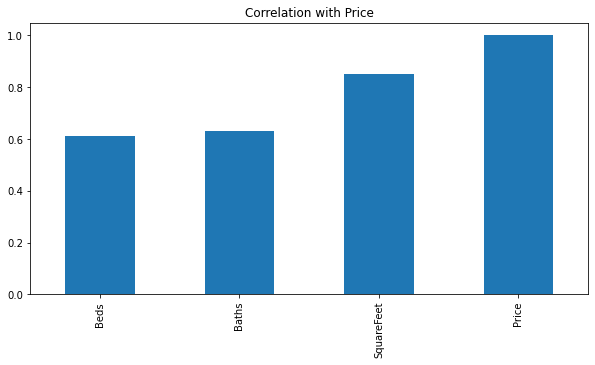

In [7]:
df.corrwith(df['Price']).plot.bar(figsize=(10,5), title='Correlation with Price')


In [8]:
X = df[['Baths','SquareFeet','Beds']]
y  = df['Price']  

In [9]:
import xgboost as xgb


C:\Users\aishw\miniconda3\envs\digi\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [10]:
data_matrix = xgb.DMatrix(X,y)


C:\Users\aishw\miniconda3\envs\digi\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [11]:
params = {
    'learning_rate' : .01,
    'max_depth' : 5,
    'alpha' : 10,
}

results = xgb.cv(
    params,
    data_matrix,
    num_boost_round=500,
    early_stopping_rounds=5,
    metrics='rmse',
)
results

,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,256239.557292,2333.819371,256206.869792,4700.038664
1,253795.562500,2308.400033,253766.322917,4629.855031
2,251376.619792,2283.126506,251351.088542,4560.587006
3,248982.203125,2258.205376,248960.416667,4491.814223
4,246612.140625,2233.561076,246593.984375,4423.541007
...,...,...,...,...
377,32200.534505,1530.314797,50078.691406,6785.920692
378,32162.222657,1530.840863,50080.454427,6801.687894
379,32127.600261,1527.447339,50079.397136,6813.388777
380,32093.072917,1524.277313,50079.955729,6831.337502


<AxesSubplot:>

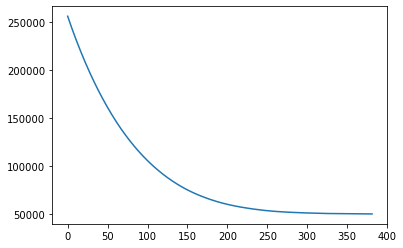

In [12]:
params = {
    'learning_rate' : .01,
    'max_depth' : 5,
    'alpha' : 10,
}

results = xgb.cv(
    params,
    data_matrix,
    num_boost_round=500,
    early_stopping_rounds=5,
    metrics='rmse',
)
results['test-rmse-mean'].plot()


In [13]:
grid_params = [
    (max_depth, learning_rate, alpha)
    for max_depth in range(5,20,5)
    for learning_rate in [.01,.1,.5]
    for alpha in range(0,50,5)
]

min_rmse = float('inf')
best_params = None

for max_depth,learning_rate,alpha in grid_params:
    params = {
        'max_depth' : max_depth,
        'learning_rate' : learning_rate,
        'alpha' : alpha,
    }
    results = xgb.cv(
        params,
        data_matrix,
        num_boost_round=500,
        early_stopping_rounds=5,
        metrics='rmse',
    )
    current_rmse = results['test-rmse-mean'].min()
    if current_rmse < min_rmse:
        min_rmse = current_rmse
        best_params = (max_depth,learning_rate,alpha)
    print(f'Current best params: {best_params}')


Current best params: (5, 0.01, 0)
Current best params: (5, 0.01, 5)
Current best params: (5, 0.01, 5)
Current best params: (5, 0.01, 5)
Current best params: (5, 0.01, 20)
Current best params: (5, 0.01, 20)
Current best params: (5, 0.01, 20)
Current best params: (5, 0.01, 20)
Current best params: (5, 0.01, 40)
Current best params: (5, 0.01, 40)
Current best params: (5, 0.01, 40)
Current best params: (5, 0.01, 40)
Current best params: (5, 0.01, 40)
Current best params: (5, 0.01, 40)
Current best params: (5, 0.01, 40)
Current best params: (5, 0.01, 40)
Current best params: (5, 0.01, 40)
Current best params: (5, 0.01, 40)
Current best params: (5, 0.01, 40)
Current best params: (5, 0.01, 40)
Current best params: (5, 0.5, 0)
Current best params: (5, 0.5, 5)
Current best params: (5, 0.5, 10)
Current best params: (5, 0.5, 15)
Current best params: (5, 0.5, 20)
Current best params: (5, 0.5, 25)
Current best params: (5, 0.5, 30)
Current best params: (5, 0.5, 35)
Current best params: (5, 0.5, 40)


In [14]:
best_params

(5, 0.5, 45)

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
xtrain, xtest, ytrain, ytest = train_test_split(X,y,test_size=.3,random_state=1234)

In [17]:
train_matrix = xgb.DMatrix(xtrain,ytrain)
test_matrix = xgb.DMatrix(xtest,ytest)


C:\Users\aishw\miniconda3\envs\digi\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [18]:
model = xgb.train(
     params,
     train_matrix,
     num_boost_round=500,
     early_stopping_rounds=5,
     evals=[(test_matrix,'test')],
)
model.save_model('house_pricing_model.xgb')

[0]	test-rmse:128478.05469
[1]	test-rmse:72552.41406
[2]	test-rmse:50759.97266
[3]	test-rmse:45224.98047
[4]	test-rmse:44342.80469
[5]	test-rmse:44436.41406
[6]	test-rmse:45128.63281
[7]	test-rmse:46169.65625
[8]	test-rmse:46801.19922


In [19]:
saved_model = xgb.Booster()
saved_model.load_model('house_pricing_model.xgb')

In [20]:
X.head(2)

,Baths,SquareFeet,Beds
0,1,836,2
1,1,1167,3


In [21]:
saved_model.predict(xgb.DMatrix(X.head(2)))

C:\Users\aishw\miniconda3\envs\digi\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


array([136308.56, 174246.06], dtype=float32)

In [22]:
y[:2]

0    138159.85
1    167541.46
Name: Price, dtype: float64

In [23]:
import matplotlib.pyplot as plt

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

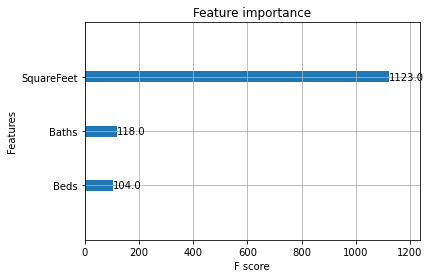

In [24]:
xgb.plot_importance(model) # tells us which features are important

In [25]:
df['pred']=saved_model.predict(xgb.DMatrix(X))
df.head()

,Beds,Baths,SquareFeet,Price,pred
0,2,1,836,138159.85,136308.562500
1,3,1,1167,167541.46,174246.062500
2,2,1,796,119095.12,143760.390625
3,2,1,852,130904.95,133892.750000
4,2,1,797,120266.19,122930.515625


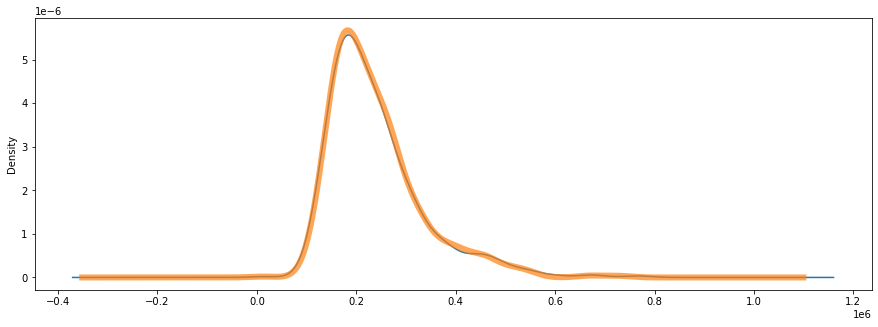

In [27]:
ax = df['Price'].plot.kde(label='Actual',figsize=(15,5))
df['pred'].plot.kde(ax=ax,linewidth=6,label='Predicted',alpha=.7)
plt.show()